# Week 10 Assignment
Megan Holford

DSC 650

Spring 2022

<b>10.1</b>

In the first part of the assignment, you will implement basic text-preprocessing functions in Python. These functions do not need to scale to large text documents and will only need to handle small inputs.

Assignment 10.1.a

Create a tokenize function that splits a sentence into words. Ensure that your tokenizer removes basic punctuation.

In [1]:
import keras
import pandas as pd


In [2]:
def tokenize(sentence):
    tokens = keras.preprocessing.text.text_to_word_sequence(sentence)
    return(tokens)

In [3]:
tokens = tokenize("When I was a young boy my father took me into the city to see a marching band.")
tokens

['when',
 'i',
 'was',
 'a',
 'young',
 'boy',
 'my',
 'father',
 'took',
 'me',
 'into',
 'the',
 'city',
 'to',
 'see',
 'a',
 'marching',
 'band']

Assignment 10.1.b

Implement an `ngram` function that splits tokens into N-grams. 


In [4]:
def ngram(tokens, n):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngram = ' '.join(word_list for word_list in tokens[i:i+n])
        ngrams.append(ngram)
    return(ngrams)

In [5]:
ngram = ngram(tokens,4)
ngram

['when i was a',
 'i was a young',
 'was a young boy',
 'a young boy my',
 'young boy my father',
 'boy my father took',
 'my father took me',
 'father took me into',
 'took me into the',
 'me into the city',
 'into the city to',
 'the city to see',
 'city to see a',
 'to see a marching',
 'see a marching band']

Assignment 10.1.c

Implement an one_hot_encode function to create a vector from a numerical vector from a list of tokens.

In [6]:
def one_hot_encode(tokens):
    token_index = {}
    for token in tokens:
        if token in token_index:
            token_index[token] += 1
        else:
            token_index[token] = 1
            
    return([token_index.values()], token_index.keys())

In [7]:
vals, cols = one_hot_encode(tokens)
df = pd.DataFrame(vals, columns=cols)

df

when  i  was  a  young  boy  my  father  took  me  into  the  city  to  \
0     1  1    1  2      1    1   1       1     1   1     1    1     1   1   

   see  marching  band  
0    1         1     1

<b>10.2</b>

Using listings 6.16, 6.17, and 6.18 in Deep Learning with Python as a guide, train a sequential model with embeddings on the IMDB data found in data/external/imdb/. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [8]:
import os
import numpy as np

imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [9]:
max_words = 10000
embedding_dim = 100
maxlen = 100
training_samples = 200
validation_samples = 10000

In [10]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

data = keras.preprocessing.sequence.pad_sequences(sequences,maxlen=maxlen)
labels = np.asarray(labels)

In [11]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

In [12]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
#model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
dense (Dense)                (None, 100, 32)           3232      
_________________________________________________________________
dense_1 (Dense)              (None, 100, 1)            33        
Total params: 1,003,265
Trainable params: 1,003,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 199ms/step - loss: 0.6911 - acc: 0.5317 - val_loss: 0.6923 - val_acc: 0.5169
Epoch 2/10
7/7 [==============================] - 1s 150ms/step - loss: 0.6819 - acc: 0.6249 - val_loss: 0.6921 - val_acc: 0.5200
Epoch 3/10
7/7 [==============================] - 1s 149ms/step - loss: 0.6741 - acc: 0.6458 - val_loss: 0.6932 - va

In [14]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [15]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)


In [16]:
model.evaluate(x_test,y_test)


782/782 [==============================] - 2s 3ms/step - loss: 0.7117 - acc: 0.5261


[0.711679995059967, 0.5261073708534241]

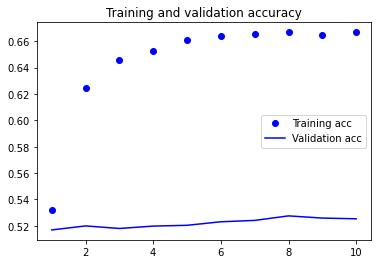

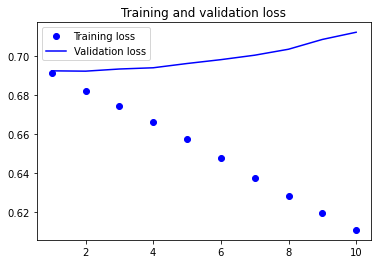

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<b>10.3</b>

Using listing 6.27 in Deep Learning with Python as a guide, fit the same data with an LSTM layer. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [18]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 0s 225ms/step - loss: 0.6929 - acc: 0.4875 - val_loss: 0.6914 - val_acc: 0.5500
Epoch 2/10
2/2 [==============================] - 0s 80ms/step - loss: 0.6762 - acc: 0.7625 - val_loss: 0.6910 - val_acc: 0.4750
Epoch 3/10
2/2 [==============================] - 0s 74ms/step - loss: 0.6562 - acc: 0.7437 - val_loss: 0.6895 - val_acc: 0.4750
Epoch 4/10
2/2 [==============================] - 0s 75ms/step - loss: 0.6262 - acc: 0.7500 - val_loss: 0.6949 - val_acc: 0.4750
Epoch 5/10
2/2 [==============================] - 0s 80ms/step - loss: 0.5780 - acc: 0.6687 - val_loss: 0.7370 - val_acc: 0.4750
Epoch 6/10
2/2 [==============================] - 0s 83ms/step - loss: 0.5062 - acc: 0.6187 - val_loss: 0.6888 - val_acc: 0.4750
Epoch 7/10
2/2 [==============================] - 0s 79ms/step - loss: 0.4416 - acc: 0.8375 - val_loss: 0.6684 - val_acc: 0.5500
Epoch 8/10
2/2 [==============================] - 0s 71ms/step - loss: 0.4052 - acc: 0.9625 - va

In [19]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 15s 19ms/step - loss: 0.8565 - acc: 0.5326


[0.8565438389778137, 0.5326399803161621]

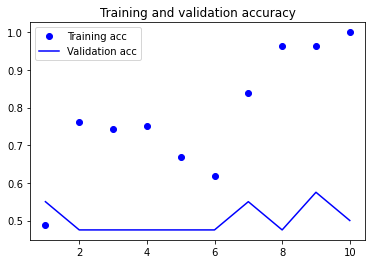

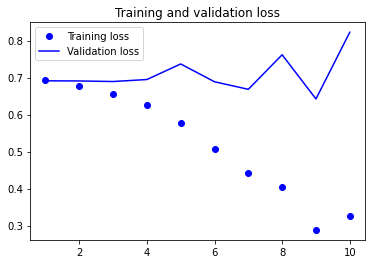

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<b>10.4</b>

Using listing 6.46 in Deep Learning with Python as a guide, fit the same data with a simple 1D convnet. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [21]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

max_features = 10000
max_len = 100

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 94, 32)            28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 18, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 32)            7200      
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 385       
Total params: 1,316,289
Trainable params: 1,316,289
Non-trainable params: 0
____________________________________________

Epoch 55/100
2/2 [==============================] - 0s 26ms/step - loss: 0.3391 - acc: 0.9937 - val_loss: 0.6895 - val_acc: 0.5500
Epoch 56/100
2/2 [==============================] - 0s 24ms/step - loss: 0.3280 - acc: 1.0000 - val_loss: 0.6927 - val_acc: 0.5750
Epoch 57/100
2/2 [==============================] - 0s 19ms/step - loss: 0.3157 - acc: 1.0000 - val_loss: 0.6953 - val_acc: 0.5500
Epoch 58/100
2/2 [==============================] - 0s 25ms/step - loss: 0.3042 - acc: 1.0000 - val_loss: 0.6974 - val_acc: 0.5250
Epoch 59/100
2/2 [==============================] - 0s 25ms/step - loss: 0.2929 - acc: 1.0000 - val_loss: 0.7015 - val_acc: 0.5000
Epoch 60/100
2/2 [==============================] - 0s 25ms/step - loss: 0.2814 - acc: 1.0000 - val_loss: 0.7034 - val_acc: 0.5000
Epoch 61/100
2/2 [==============================] - 0s 27ms/step - loss: 0.2704 - acc: 1.0000 - val_loss: 0.7103 - val_acc: 0.4750
Epoch 62/100
2/2 [==============================] - 0s 27ms/step - loss: 0.2592 - a

In [22]:
model.evaluate(x_test,y_test)


782/782 [==============================] - 3s 3ms/step - loss: 0.6850 - acc: 0.5606


[0.6850090026855469, 0.5605999827384949]

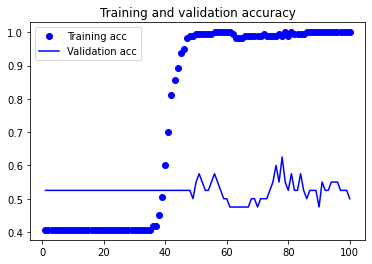

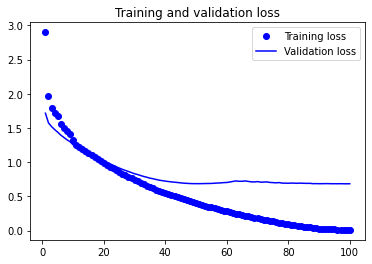

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()